# Лекция 10. Библиотека Pandas
В прошлой лекции мы уже пользовались библиотекой Pandas для анализа данных, а теперь давайте разберёмся с её объектами и возможностями по порядку.

In [ ]:
import numpy as np
import pandas as pd

## Объекты класса `pandas.Series`
Серия — это массив NumPy, но с именем и с дополнительной индексацией ячеек: индексами на основе меток (label-based indexing).

Если индексы-метки не указать при создании серии, то по умолчанию они совпадают с порядковыми индексами от 0.

In [ ]:
ages = pd.Series([22, 35, 25, 16], name="age")
print(ages)

0    22
1    35
2    25
3    16
Name: age, dtype: int64


Можно явно указать индексы через параметр конструктора `index`:

In [ ]:
named_ages = pd.Series(data=[22, 35, 25, 16], index=["Aline", "Beatrice", "Clara", "Diana"], dtype=np.int32, name="age")
print(named_ages)

Aline       22
Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32


Доступ с квадратными скобками `series[i]` возможен как через числовые индексы, так и по меткам:

In [ ]:
named_ages["Beatrice"]

35

In [ ]:
named_ages[1]

35

### Сложности двойной индексации и их решение: `loc`, `iloc`, `at`, `iat`
Создадим простую серию с числами и возьмём её срез:

In [ ]:
numbers = pd.Series(range(0, 1000, 100))
the_slice = numbers[2:7]
print(the_slice)

2    200
3    300
4    400
5    500
6    600
dtype: int64


Обратите внимание, что после среза индексы-метки остались закреплёнными за своими значениями элементов.
Это правильно с точки зрения *идентификации* хранимых данных. Особенно, если данные про одну сущность будут находиться в разных сериях и потом их нужно будет сопоставлять.

Однако, в результате появляется **неоднозначность индексации**.

Доступ с квадратными скобками теперь работает только по индексам-меткам:

In [ ]:
the_slice[2]

200

Если же для такой неоднозначной ситуации взять срез, то мы получим "жёлтую карточку" — предупреждение от Pandas:

In [ ]:
the_slice[2:5]

C:\Users\tkhirianov\AppData\Local\Temp\ipykernel_13836\3843711125.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  the_slice[2:5]


4    400
5    500
6    600
dtype: int64

Как видите, мы получили срез по порядковым индексам, но  *библиотека предупреждает о будущем изменении поведения*: скоро в таких ситуациях будет осуществляться срез по индексам-меткам.

Достоверно доступиться к элементам серии по порядковому индексу можно через **локатор** `iloc`:

In [ ]:
the_slice.iloc[2:5]

4    400
5    500
6    600
dtype: int64

А достоверный доступ и срез через индексы-метки мы получим через **локатор** `loc`:

In [ ]:
the_slice.loc[2:5]

2    200
3    300
4    400
5    500
dtype: int64

Взгляните! элемент с индексом-меткой 5 включён в срез, что противоречит логике `range(start, stop, step)`.
Почему так?! Подумайте про срезы с метками строкового типа и посмотрите на пример ниже:

In [ ]:
named_ages.loc["Beatrice":"Diana"]

Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32

Если доступ нужен только к одному элементу, то можно вместо `loc` и `iloc` воспользоватсья `at` и `iat`:

In [ ]:
the_slice.at[4]

400

In [ ]:
the_slice.iat[4]

600

### Добавление данных в серию, удаление
В отличие от массивов NumPy, серии имеют переменный размер:

In [ ]:
s = pd.Series(data=[0, 10, 20, 30], index=[1, 2, 3, 4])
print(s)

1     0
2    10
3    20
4    30
dtype: int64


In [ ]:
s.pop(1) # удаление элемента с индексом-меткой 1

0

In [ ]:
print(s)

2    10
3    20
4    30
dtype: int64


Добавление элементов с присваиванием индекса-метки можно делать через локатор `loc`:

In [ ]:
s.loc[5] = 50
print(s)

2    10
3    20
4    30
5    50
dtype: int64


Обратите внимание, что таким добавлением можно нарушить порядок индексов:

In [ ]:
s.loc[4] = 40
print(s)

2    10
3    20
4    40
5    50
dtype: int64


Если индексы-метки нужно пересортировать, можно сделать это при помощи `sort_index`:

In [ ]:
s.sort_index(inplace=True)
print(s)

2    10
3    20
4    40
5    50
dtype: int64


Ещё более курьёзную ситуацию с индексами можно создать при помощи конкатенации серий функцией `pd.concat`:

In [ ]:
a = pd.Series(data=[10, 20, 40], index=[1, 2, 4])
b = pd.Series(data=[100, 200, 300], index=[1, 2, 3])
c = pd.concat([a, b])
print(c)

1     10
2     20
4     40
1    100
2    200
3    300
dtype: int64


In [ ]:
c.index

Int64Index([1, 2, 4, 1, 2, 3], dtype='int64')

In [ ]:
c[1] = 10000
print(c)

1    10000
2       20
4       40
1    10000
2      200
3      300
dtype: int64


Итак, **индексы-метки могут оказаться не уникальными**!!! И присваивание в такую метку приводит к изменению всех значений с этой меткой.

Лучше такой ситуации не создавать. Вот так можно проверить, что метки уникальны:

In [ ]:
c.index.is_unique

False

### Редукция серий
Агрегирующие методы по сравнению с массивами `NumPy.ndarray` в сериях переопределены: в них допускаются и просто игнорируются пустые ячейки, которые представлены как `NaN` (Not a Number).

In [ ]:
values = [1, 3, 5, np.nan, 1, np.nan, 3]
array = np.array(values)
series = pd.Series(values)

for container in array, series:
    print(type(container))
    print(container.min(), container.max(), container.sum(), container.prod(), sep='\t')

<class 'numpy.ndarray'>
nan	nan	nan	nan
<class 'pandas.core.series.Series'>
1.0	5.0	13.0	45.0


Уникальные значения из серии можно получить методом `unique`. Только нужно понимать, что результат — это уже не серия, а просто массив NumPy, поскольку для массива уникальных значений теряется смысл индексов-меток:

In [ ]:
series.unique()

array([ 1.,  3.,  5., nan])

Частотный анализ для значений в серии можно запустить методом `value_counts`:

In [ ]:
series.value_counts()

1.0    2
3.0    2
5.0    1
dtype: int64

Для статистической обработки есть большое количество методов:

In [ ]:
series.mean()  # среднее арифметическое

2.6

In [ ]:
series.std()  # среднеквадратическое отклонение

1.6733200530681511

In [ ]:
series.median()  # медиана

3.0

In [ ]:
series.quantile(3/4)  # произвольный квантиль, например, 3-я квартиль (число, меньше либо равно которого 75% чисел серии)

3.0

Все функции выше вычислялись только *для содержательных — не пустых* элементов серии. Узнать их количество можно методом `count`:

In [ ]:
series.count()  # количество содержательных элементов в серии

5

### Отсутствующие значения в серии
Поскольку в серии допускаются значения `NaN`, которые по-умолчанию не учитываются в статистических функциях, нужно уметь с ними работать:
1. проверять факт их наличия в серии,
2. считать их количество,
3. выбрасывать (`drop`) такие ячейки из серии,
4. массово заменять их на другие значения.

In [ ]:
series.isna()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [ ]:
series.isna().any()

True

Просуммировав эту серию, мы узнаем количество пустых ячеек (т.к. при арифметическом сложении превращаются: `True` — в `1`, а `False` — в `0`):

In [ ]:
series.isna().sum()

2

In [ ]:
series.dropna()

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

Надо помнить, что метод `dropna`, как и многие другие методы, *не модифицирует текущую серию, а создаёт и возвращает новую*. Поэтому наша серия останется в старом состоянии:

In [ ]:
series

0    1.0
1    3.0
2    5.0
3    NaN
4    1.0
5    NaN
6    3.0
dtype: float64

Если мы хотим поменять текущую серию, нужно указать значение ключевого параметра `inplace=True`:

In [ ]:
series.dropna(inplace=True)
series

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

То же касается метода `fillna` массовой замены значений `NaN` на другое:

In [ ]:
series = pd.Series([1, 3, 5, np.nan, 1, np.nan, 3])
series.fillna(0, inplace=True)
series

0    1.0
1    3.0
2    5.0
3    0.0
4    1.0
5    0.0
6    3.0
dtype: float64

### Векторные (массовые операции)
Как и для массивов NumPy для серий работают массовые операции:

In [ ]:
A = pd.Series(data=[10, 20, 30, 40], index=["A", "B", "C", "D"])
B = pd.Series(data=[1, 2, 3, 4], index=["A", "B", "C", "D"])

In [ ]:
A + B

A    11
B    22
C    33
D    44
dtype: int64

In [ ]:
A * B

A     10
B     40
C     90
D    160
dtype: int64

Массовые операции работают не только с двумя сериями, но и с константами:

In [ ]:
-A + 25

A    15
B     5
C    -5
D   -15
dtype: int64

In [ ]:
A > 20

A    False
B    False
C     True
D     True
dtype: bool

In [ ]:
B == 3

A    False
B    False
C     True
D    False
dtype: bool

In [ ]:
B != 3

A     True
B     True
C    False
D     True
dtype: bool

Применить какую-то функцию к каждому элементу серии можно при помощи метода `apply`:

In [ ]:
B.apply(lambda x: x*100)

A    100
B    200
C    300
D    400
dtype: int64

Значения из одной серии можно *массово скопировать в другую серию* методом `update`, при этом опора будет производиться на индексы-метки, а не на последовательность элементов. При этом для меток старой серии, к которой не найдены метки новой серии, будут оставлены старые значения:

In [ ]:
A = pd.Series(data=[100, 200, 500, 0], index=["Aline", "Beatrice", "Clara", "Diana"], name="money")
B = pd.Series(data=[300, 0], index=["Diana", "Aline"])
print(A)
A.update(B)
print(A)

Aline       100
Beatrice    200
Clara       500
Diana         0
Name: money, dtype: int64
Aline         0
Beatrice    200
Clara       500
Diana       300
Name: money, dtype: int64


## Объекты класса DataFrame
После знакомства с сериями `Series` легче понять как формируется лист с данными.
По сути это несколько серий-столбцов с одинаковым индексом по вертикали, а последовательность имён столбцов составляет горизонтальный индекс таблицы.

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]},
                  index = ["first", "second", "third"])
df

,A,B,C
first,1,4,7
second,2,5,8
third,3,6,9


In [ ]:
df.index

Index(['first', 'second', 'third'], dtype='object')

In [ ]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

Доступ к сериям-столбцам можно делать через квадратные скобки или через оператор `.` (если имя является допустимым идентификатором):

In [ ]:
df['A']

first     1
second    2
third     3
Name: A, dtype: int64

In [ ]:
df.A

first     1
second    2
third     3
Name: A, dtype: int64

In [ ]:
type(df.A)

pandas.core.series.Series

Однако, отличие в доступе всё-таки есть. Через точку нельзя создать новый столбец:

In [ ]:
df.D = df.A*100 + df.B*10 + df.C
df

C:\Users\tkhirianov\AppData\Local\Temp\ipykernel_13836\4145806869.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.D = df.A*100 + df.B*10 + df.C


,A,B,C
first,1,4,7
second,2,5,8
third,3,6,9


In [ ]:
df['D'] = df.A*100 + df.B*10 + df.C
df

,A,B,C,D
first,1,4,7,147
second,2,5,8,258
third,3,6,9,369


In [ ]:
df['D']

first     147
second    258
third     369
Name: D, dtype: int64

### Сложности индексации и их решение: loc, iloc.
Квадратные скобки дают как доступ к столбцам, так и, в случае среза — к строкам:

In [ ]:
df[1:3]  # срез по порядковым индексам

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


In [ ]:
df['first':'second']  # срез по индексам-меткам (включая конечную)

,A,B,C,D
first,1,4,7,147
second,2,5,8,258


Как вы помните, это может приводить к неоднозначности, поэтому лучше использовать `loc` или `iloc`:

In [ ]:
df.iloc[1:3]

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


In [ ]:
df.loc['first':'second']

,A,B,C,D
first,1,4,7,147
second,2,5,8,258


Новая возможность — локатор позволяет получить *серию значений одной строки*. В этом случае индекс строки становится `name` серии:

In [ ]:
df.loc['second']

A      2
B      5
C      8
D    258
Name: second, dtype: int64

*Запятая в квадратных скобках* позволяет достать **значение конкретной ячейки** или **срез по строкам и столбцам одновременно**:

In [ ]:
df.loc['first', 'A']

1

In [ ]:
df.loc['first':'second', 'B':'C']

,B,C
first,4,7
second,5,8


Также интересно то, что **локатор в квадратных скобках может принимать список индексов**, причём в произвольном порядке:

In [ ]:
df.loc[['third', 'first'], ['D', 'B', 'C']]

,D,B,C
third,369,6,9
first,147,4,7


В срезах можно пропускать параметры начала и конца, а также указывать третий параметр — шаг:

In [ ]:
df.iloc[:, ::-1]

,D,C,B,A
first,147,7,4,1
second,258,8,5,2
third,369,9,6,3


### Редукция столбцов и строк
Очевидно, редукцию одного конкретного столбца или строки с конкретным индексом можно выполнить, предварительно выделив её как `Series`, но есть и возможность массовой редукции по заданной оси:

In [ ]:
df.sum(axis=1)  # указываем axis=1 для свёртки по горизонтали

first     159
second    273
third     387
dtype: int64

In [ ]:
df.sum()  # по-умолчанию axis=0, свёртка по вертикали

A      6
B     15
C     24
D    774
dtype: int64

In [ ]:
df.max()

A      3
B      6
C      9
D    369
dtype: int64

In [ ]:
df.idxmax()

A    third
B    third
C    third
D    third
dtype: object

Можно сделать свёртку сразу несколькими функциями при помощи метода `aggregate` (alias `agg`):

In [ ]:
df.aggregate(['min', 'idxmin', 'max', 'idxmax', 'mean', 'sum'])

,A,B,C,D
min,1,4,7,147
idxmin,first,first,first,first
max,3,6,9,369
idxmax,third,third,third,third
mean,2.0,5.0,8.0,258.0
sum,6,15,24,774


### Чистка данных. Методы `drop` и `dropna`
Исходные данные часто содержат лишнюю информацию, которую требуется исключить. Если нужно сохранить изменения в самой таблице, то следует добавлять параметр `inplace=True`, но сейчас мы этого делать не будем, оставляя лист в его исходном состоянии.

Чтобы отбросить лишние столбцы, используют метод `drop` с ключевым параметром `columns` и списком имён:

In [ ]:
df.drop(columns=['B', 'D'])

,A,C
first,1,7
second,2,8
third,3,9


Для отбрасывания строк используют метод `drop` с ключевым параметром `labels`:

In [ ]:
df.drop(labels=['first'])

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


Теперь добавим в лист одну ячейку `NaN`:

In [ ]:
df.loc['second', 'C'] = np.nan
df

,A,B,C,D
first,1,4,7.0,147
second,2,5,NaN,258
third,3,6,9.0,369


Теперь посмотрите как работает метод `dropna`:

In [ ]:
df.dropna()  # по умолчанию выбрасываются все строки, в которых есть хотя бы одно значение NaN

,A,B,C,D
first,1,4,7.0,147
third,3,6,9.0,369


In [ ]:
df.dropna(axis='columns')  # можно вместо строк с NaN выбросить столбцы:

,A,B,D
first,1,4,147
second,2,5,258
third,3,6,369


Кроме стратегии выбрасывания данных есть ещё возможность заполнить пропуски константой:

In [ ]:
df.fillna(0)

,A,B,C,D
first,1,4,7.0,147
second,2,5,0.0,258
third,3,6,9.0,369


Или, как вариант, заполнить ячейки `NaN` через интерполяцию <sup>[[1]](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)</sup> по соседним ячейкам серии-столбца:

In [ ]:
df.interpolate()

,A,B,C,D
first,1,4,7.0,147
second,2,5,8.0,258
third,3,6,9.0,369


## Сложные приёмы обработки данных
Есть некоторые приёмы работы с `DataFrame`, которые позволяют быстро переформатировать данные так, чтобы необходимая информация лежала на поверхности.

Представьте себе ситуацию, когда исходная таблица с данными содержит случаи, которые можно *классифицировать* по нескольким категориям. Например, друзья работали на огороде и собирали картошку и морковку. Вот таблица их "вкладов" в общую корзину:

In [ ]:
commits = pd.DataFrame({"name": ["Петя", "Вася", "Таня", "Петя", "Петя", "Таня", "Вася", "Петя", "Таня"],
                        "potatoes": [3, 4, 0, 3, 4, 0, 6, 3, 0],
                        "carrots": [0, 2, 5, 2, 1, 4, 15, 2, 6]})
commits

,name,potatoes,carrots
0,Петя,3,0
1,Вася,4,2
2,Таня,0,5
3,Петя,3,2
4,Петя,4,1
5,Таня,0,4
6,Вася,6,15
7,Петя,3,2
8,Таня,0,6


Конечно, мы можем найти суммарное количество картошек и морковок в общей корзине или минимальное/максимальное количество за 1 вклад:

In [ ]:
commits.sum()

name        ПетяВасяТаняПетяПетяТаняВасяПетяТаня
potatoes                                      23
carrots                                       37
dtype: object

In [ ]:
commits.agg(["min", "max"])

,name,potatoes,carrots
min,Вася,0,0
max,Таня,6,15


Однако, имена тут только мешают, не имеют содержательной информации. А хотелось бы узнать статистику по каждому другу отдельно...

### Метод `groupby`
Метод `groupby` осуществляет что-то вроде корзинной сортировки для последующей редукции.

Группировка происходит по уникальным значениям в указанном столбце. Эти значения будут играть роль индекса в новом листе.

In [ ]:
commits.groupby("name")  # разложим все вклады по именам вкладчиков

Объект со сгруппированными по указанному столбцу объектами мы и видим, но чтобы его использовать по назначению, требуется агрегировать случаи в каждой группе

In [ ]:
commits.groupby("name").sum()  # количество овощей, *сгруппированное* по имени вкладчика:

,potatoes,carrots
name,,
Вася,10,17
Петя,13,5
Таня,0,15


Чтобы вычислить несколько статистических функций, можно использовать метод `agg` (синоним `aggregate`).

In [ ]:
commits.groupby("name").carrots.aggregate(["min", "max"])  # мин. и макс. количество морковок за один вклад

,min,max
name,,
Вася,2,15
Петя,0,2
Таня,4,6


Если агрегацию при этом сделать сразу по нескольким числовым столбцам, то у нас получится *двухуровневый индекс* для столбцов:

In [ ]:
commits.groupby("name").aggregate(["min", "max"])  # мин. и макс. количество овощей за один вклад

potatoes     carrots    
          min max     min max
name                         
Вася        4   6       2  15
Петя        3   4       0   2
Таня        0   0       4   6

### Сводная таблица `pivot_table`
Иногда нужно осуществить группировку случаев-строк сразу по нескольким категориальным параметрам.

Допустим, участники олимпиады по программированию отправляли задачи в электронный контест. Таблица отправок в систему содержит:

1. `run_id` — идентификатором запуска проверки,
2. `username` — хешем имени пользователя,
3. `problem` — буквой-идентификатором решаемой задачи,
4. `result` — вердиктом проверяющей системы,
5. `tests` — количеством успешно пройденных тестов при запуске,
6. `score` — набранными очками.

In [ ]:
runs = pd.read_csv("olymp3_results.csv", index_col='run_id')
runs.head()

,username,problem,result,tests,score
run_id,,,,,
0,ae7ba9eb,B,OK,12,120
1,3470f1fd,A,OK,4,100
2,ae7ba9eb,C,OK,20,120
3,3470f1fd,B,partial,11,11
4,3470f1fd,B,OK,12,119


Обратите внимание, что один и тот же участник мог отправлять задачу много раз.
Допустим, нас интересует максимальное количество очков за каждый вид задачи, причём — отдельно для каждого пользователя.

В этом случае разумно сделать в сводной таблице идентификатор пользователя индексом-меткой строки, а букву-идентфикатор задачи — индексом-меткой столбца. При этом информация из столбцов `result`, `test` и индекса `run_id` нас не интересует совсем — в качестве *значений* нас интересует только `score`:

In [ ]:
standings = runs.pivot_table(values="score", index="username", columns="problem", aggfunc="max")
standings  # сводная таблица результатов участников

problem,A,B,C,D,E,F,G
username,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,NaN,NaN,NaN
04652344,100.0,120.0,120.0,99.0,NaN,200.0,200.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0
144a02e6,99.0,119.0,3.0,99.0,150.0,NaN,2.0
3274f498,100.0,119.0,119.0,99.0,149.0,NaN,197.0
3470f1fd,100.0,119.0,120.0,100.0,149.0,197.0,194.0
4d990bd5,NaN,NaN,120.0,NaN,NaN,NaN,NaN
63590cda,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6bfd137c,100.0,120.0,19.0,100.0,NaN,NaN,NaN


Из пожеланий к этой таблице результатов:

In [ ]:
# 1. Заменить `NaN` на 0.
standings.fillna(0, inplace=True)  # можно было указать fill_value=0 для pivot_table
standings.head(3)

problem,A,B,C,D,E,F,G
username,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,0.0,0.0,0.0
04652344,100.0,120.0,120.0,99.0,0.0,200.0,200.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0


In [ ]:
# 2. В последнем столбце `score` посчитать сумму
#    максимальных достигнутых баллов для каждого пользователя.
standings["score"] = standings.sum(axis=1)
standings.head(3)

problem,A,B,C,D,E,F,G,score
username,,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,0.0,0.0,0.0,439.0
04652344,100.0,120.0,120.0,99.0,0.0,200.0,200.0,839.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0,976.0


In [ ]:
# 3. Отсортировать по убыванию `score` все строки таблицы.
standings.sort_values(by="score", ascending=False, inplace=True)
standings.head(3)  # лучшие по сумме баллов 3 участника олимпиады:

problem,A,B,C,D,E,F,G,score
username,,,,,,,,
f832dae3,98.0,120.0,120.0,99.0,148.0,200.0,199.0,984.0
3470f1fd,100.0,119.0,120.0,100.0,149.0,197.0,194.0,979.0
baee5b3d,100.0,119.0,120.0,99.0,148.0,197.0,194.0,977.0


### Разворачивание сводной таблицы `melt`
**Обратное преобразование из сводной таблицы в таблицу случаев невозможно!**

Это очевидно, поскольку:
1. при подготовке сводной таблицы производилась агрегация (редукция серии чисел к одному числу),
2. часть столбцов, не относящаяся к `values`, игнорировалась.

Однако, можно развернуть ту небольшую статистическую выжимку, которая у нас осталась.
Для таблицы результатов олимпиады это будут только лучшие отправки по каждому пользователю и задаче:

In [ ]:
standings.reset_index().melt(id_vars=['username'], value_vars=['A', 'B', 'C', 'C', 'E', 'F', 'G'])

,username,problem,value
0,f832dae3,A,98.0
1,3470f1fd,A,100.0
2,baee5b3d,A,100.0
3,133bea0b,A,99.0
4,898693b2,A,100.0
...,...,...,...
139,c0065bd3,G,0.0
140,6bfd137c,G,0.0
141,4d990bd5,G,0.0
142,d4b7e0db,G,0.0


Замечание. Для того, чтобы использовать `username` в качестве `id_vars` пришлось вначале убрать его из индекса в обычный столбец при помощи `reset_index()`.

## Слияние данных из нескольких таблиц
Иногда данные о случаях или объектах содержатся в нескольких таблицах, при этом в каждой таблице есть своя специфика.

### Конкатенация таблиц `concat` 
При использовании конкатенации происходит механическое прибавление строк второй таблицы к строкам первой таблицы:

In [ ]:
scores1 = pd.DataFrame({'login':  ['login1', 'login2', 'login3'],
                        'A': [2, 0, 5], 'B': [5, 3, 5], 'C': [5, 3, 5],})
scores1

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5


In [ ]:
scores2 = pd.DataFrame({'login':  ['login4', 'login5'],
                        'A': [1, 3], 'B': [3, 0], 'C': [4, 2]})
scores2

,login,A,B,C
0,login4,1,3,4
1,login5,3,0,2


In [ ]:
scores = pd.concat([scores1, scores2])
scores

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5
0,login4,1,3,4
1,login5,3,0,2


In [ ]:
# можно было при pd.concat() добавить ignore_index=True,
# но можно и починить поломанный индекс вручную (методом его отбрасывания):
scores.reset_index(inplace=True)
scores.drop(columns=["index"], inplace=True)
scores

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5
3,login4,1,3,4
4,login5,3,0,2


Возможна и другая конкатенация — по горизонтали (`axis=1`):

In [ ]:
scores3 = pd.DataFrame({'login':  ['login2', 'login5', 'login6'],
                        'D': [8, 2, 7], 'E': [3, 0, 10]})
scores3

,login,D,E
0,login2,8,3
1,login5,2,0
2,login6,7,10


In [ ]:
pd.concat([scores, scores3], axis=1)

,login,A,B,C,login,D,E
0,login1,2,5,5,login2,8.0,3.0
1,login2,0,3,3,login5,2.0,0.0
2,login3,5,5,5,login6,7.0,10.0
3,login4,1,3,4,NaN,NaN,NaN
4,login5,3,0,2,NaN,NaN,NaN


Осторожно!!! Обратите внимание, что теперь сломана сама логика объединения, так при соединении нужно учитывать равенство `login`.

### Объединение таблиц при помощи `merge`
Вместо функции `pd.concat()` давайте применим метод `merge`:

In [ ]:
scores.merge(scores3)

,login,A,B,C,D,E
0,login2,0,3,3,8,3
1,login5,3,0,2,2,0


У нас правильное соединились данные! Но есть нюанс в том, *как* это произошло.

Мы не указали `merge()` никаких значений параметров, а параметр `how` по умолчанию равен `'inner'`. Эта стратегия — взять только те строки, где есть полнота данных и слева, и справа. За ключи объединения берутся столбцы с одинаковыми названиями в обеих таблицах (у нас это `login`).

Вот и получается, что при `how='inner'` **в пересечении множеств ключей** (по значениями столбца `login`) только два: `login2` и `login5`.

Есть ещё 4 стратегии объединения:

In [ ]:
# `left`: сохранить всё из левой таблицы,
# информация из правой -- при совпадении ключей
scores.merge(scores3, how='left')

,login,A,B,C,D,E
0,login1,2,5,5,NaN,NaN
1,login2,0,3,3,8.0,3.0
2,login3,5,5,5,NaN,NaN
3,login4,1,3,4,NaN,NaN
4,login5,3,0,2,2.0,0.0


In [ ]:
# `right`: сохранить всё из правой таблицы,
# информация из левой -- при совпадении ключей
scores.merge(scores3, how='right')

,login,A,B,C,D,E
0,login2,0.0,3.0,3.0,8,3
1,login5,3.0,0.0,2.0,2,0
2,login6,NaN,NaN,NaN,7,10


In [ ]:
#`outer`: использует объединение ключей из обеих таблиц,
# сохранены все ключи и вся информация из обеих таблиц,
# зато пустые ячейки теперь есть во всех столбцах...
scores.merge(scores3, how='outer')

,login,A,B,C,D,E
0,login1,2.0,5.0,5.0,NaN,NaN
1,login2,0.0,3.0,3.0,8.0,3.0
2,login3,5.0,5.0,5.0,NaN,NaN
3,login4,1.0,3.0,4.0,NaN,NaN
4,login5,3.0,0.0,2.0,2.0,0.0
5,login6,NaN,NaN,NaN,7.0,10.0


Стратегия слияния `how='cross'` создает *декартово произведение* данных из обеих таблиц.
Для таблиц выше это не имеет смысла, поэтому приведём другой пример.

Есть юноши и девушки, для которых мы хотим вычислить степень их сходства:

In [ ]:
boys = pd.DataFrame({'name':  ['Петр', 'Василий', 'Тихон'],
                     'height': [183, 157, 172], 'weight': [78, 65, 95]})
boys

,name,height,weight
0,Петр,183,78
1,Василий,157,65
2,Тихон,172,95


In [ ]:
girls = pd.DataFrame({'name':  ['Мария', 'Наталья', 'Ирина'],
                      'height': [173, 164, 154], 'weight': [81, 62, 52]})
girls

,name,height,weight
0,Мария,173,81
1,Наталья,164,62
2,Ирина,154,52


In [ ]:
pairs = boys.merge(girls, how='cross')
pairs

,name_x,height_x,weight_x,name_y,height_y,weight_y
0,Петр,183,78,Мария,173,81
1,Петр,183,78,Наталья,164,62
2,Петр,183,78,Ирина,154,52
3,Василий,157,65,Мария,173,81
4,Василий,157,65,Наталья,164,62
5,Василий,157,65,Ирина,154,52
6,Тихон,172,95,Мария,173,81
7,Тихон,172,95,Наталья,164,62
8,Тихон,172,95,Ирина,154,52


Допустим, мы считаем пару подходящей, если юноша выше девушки, но не более, чем на 20 сантиметров, а её вес меньше его хотя бы на 5 кг:

In [ ]:
pairs["match"] = (abs(pairs.height_x - pairs.height_y - 10) <= 10) & (pairs.weight_x >= pairs.weight_y + 5)
pairs

,name_x,height_x,weight_x,name_y,height_y,weight_y,match
0,Петр,183,78,Мария,173,81,False
1,Петр,183,78,Наталья,164,62,True
2,Петр,183,78,Ирина,154,52,False
3,Василий,157,65,Мария,173,81,False
4,Василий,157,65,Наталья,164,62,False
5,Василий,157,65,Ирина,154,52,True
6,Тихон,172,95,Мария,173,81,False
7,Тихон,172,95,Наталья,164,62,True
8,Тихон,172,95,Ирина,154,52,True


Осталось взять из таблицы только подходящие пары, а затем выбросить и сам столбец `match`:

In [ ]:
# в квадратных скобках можно использовать логическую серию
matched = pairs[pairs.match].drop(columns=['match'])
matched

,name_x,height_x,weight_x,name_y,height_y,weight_y
1,Петр,183,78,Наталья,164,62
5,Василий,157,65,Ирина,154,52
7,Тихон,172,95,Наталья,164,62
8,Тихон,172,95,Ирина,154,52


Теперь ясно кого с кем нужно пробовать поженить :-)

### Объединение таблиц при помощи `join`
Метод `join` очень похож на `merge`, но отличается поведением по умолчанию:
1. При отсутствии ключевого параметра `on=` для объединения используются индексы.
2. При отсутствии ключевого параметра `how=` выбирается стратегия `'left'`.

In [ ]:
boys.join(girls, lsuffix='_of_boy', rsuffix='_of_girl')

,name_of_boy,height_of_boy,weight_of_boy,name_of_girl,height_of_girl,weight_of_girl
0,Петр,183,78,Мария,173,81
1,Василий,157,65,Наталья,164,62
2,Тихон,172,95,Ирина,154,52


Если вы сталкивались с реляционными базами данных, то упомянутые стратегии `merge` напоминают вам стратегии `JOIN` в SQL.

Листы с данными типа `DataFrame` имеют сходство с таблицами реляционных SQL баз данных, хотя есть и отличия:

| SQL таблица               | Pandas DataFrame                                        |
| :------------------------ | :------------------------------------------------------ |
| столбцы с именами         | столбцы с индексами-метками                             |
| столбцы со строгим типом  | столбцы типизированные (почти всегда)                   |
| порядок строк не задан    | порядок строк определён, можно сорировать               |
| доступ к строке по ключу  | доступ к строке по индексу-метке или числовому индексу  |
| первичный ключ уникален   | индекс-метка может быть не уникальна                    |

## Мастер-класс по анализу данных
Проанализируем данные из системы Яндекс.Контест по домашней работе к лекциям №1 и №2 с помощью бибилиотеки Pandas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Для начала загрузим данные по 1-му домашнему заданию и посмотрим на начало таблицы:

In [ ]:
df_res1 = pd.read_csv("result_lec01.csv")
df_res1.head()

,Unnamed: 0,place,1(Быстрая черепашка),2(Вопрос о фигуре),3(Послание ),4(Построй дом!),5(Звездочный квадрат),Score,Penalty,department,hash
0,0,1,+,+,+,+,+,5,21,Не из МГУ,b6a720e40da936c330e1f53680b279381d1c5742
1,1,2,+,+,+,+,+,5,31,Физический факультет,57bd006a9261c889d76cba7537a3b61671cbcc6a
2,2,3,+,+,+,+,+,5,35,Механико-математический факультет,0b7a6e627adeb9d50c5ecb7b5a17ea452ec87659
3,3,4,+,+,+,+,+,5,55,Факультет вычислительной математики и кибернетики,c22dc82f7e88a8973a18180d85d5a3b0cf641b75
4,4,5,+,+,+,+,+,5,64,Механико-математический факультет,1ac42c1757e5790d220299fbe51540beda8b1d8a


Иногда бывает полезно посмотреть на хвост файла (иногда там может быть "грязь"):

In [ ]:
df_res1.tail(3)

,Unnamed: 0,place,1(Быстрая черепашка),2(Вопрос о фигуре),3(Послание ),4(Построй дом!),5(Звездочный квадрат),Score,Penalty,department,hash
775,775,686-778,NaN,NaN,NaN,NaN,NaN,0,0,Факультет вычислительной математики и кибернетики,37a4fc4c4aeecdce528d4af480504b3c45f06183
776,776,686-778,NaN,NaN,NaN,NaN,NaN,0,0,Экономический факультет,e401a55b1c215efa29bfd019d006ba2aa56eae62
777,777,686-778,NaN,NaN,NaN,NaN,NaN,0,0,Механико-математический факультет,cc51b85ae5bf898223fe9813c8402f3d272feb6d


Посмотрим ещё раз на все названия столбцов:

In [ ]:
df_res1.columns

Index(['Unnamed: 0', 'place', '1(Быстрая черепашка)', '2(Вопрос о фигуре)',
       '3(Послание )', '4(Построй дом!)', '5(Звездочный квадрат)', 'Score',
       'Penalty', 'department', 'hash'],
      dtype='object')

Удаляем колонки, которые нам не пригодятся для дальнейшего анализа:

In [ ]:
df_res1.drop(['Unnamed: 0', 'place', 'Penalty'], axis = 1, inplace=True)
df_res1.shape

(778, 8)

Строк всего 778, а колонок всего 8. Переименуем колонки для дальнейшей работы:

In [ ]:
column_names = df_res1.columns
df_res1.columns = [col_name.lower().replace(')', '').replace('(', '_').replace(' ', '_') for col_name in column_names]
df_res1.columns

Index(['1_быстрая_черепашка', '2_вопрос_о_фигуре', '3_послание_',
       '4_построй_дом!', '5_звездочный_квадрат', 'score', 'department',
       'hash'],
      dtype='object')

Запросим более подробную информацию о колонках датасета: название, количество непустых ячеек, тип значений.

In [ ]:
df_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1_быстрая_черепашка   686 non-null    object
 1   2_вопрос_о_фигуре     685 non-null    object
 2   3_послание_           675 non-null    object
 3   4_построй_дом!        671 non-null    object
 4   5_звездочный_квадрат  667 non-null    object
 5   score                 778 non-null    int64 
 6   department            734 non-null    object
 7   hash                  778 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.8+ KB


Факультет — это категориальный признак. Распечатаем уникальные значения по столбцу `department`:

In [ ]:
df_res1['department'].unique()

array(['Не из МГУ', 'Физический факультет',
       'Механико-математический факультет',
       'Факультет вычислительной математики и кибернетики',
       'Химический факультет', 'Экономический факультет',
       'Высшая школа современных социальных наук',
       'Факультет космических исследований', 'Геологический факультет',
       'Факультет фундаментальной медицины',
       'Факультет фундаментальной физико-химической инженерии',
       'Факультет журналистики', nan,
       'Факультет биоинженерии и биоинформатики',
       'Географический факультет', 'Высшая школа государственного аудита',
       'Философский факультет', 'Факультет почвоведения',
       'Факультет психологии', 'Исторический факультет',
       'Биологический факультет', 'Факультет государственного управления',
       'Социологический факультет', 'Факультет глобальных процессов',
       'Биотехнологический факультет', 'Институт стран Азии и Африки',
       'Факультет иностранных языков и регионоведения',
       'Фило

Давайте посчитаем количество студентов по факультетам:

In [ ]:
df_res1['department'].value_counts()

Факультет вычислительной математики и кибернетики                     120
Экономический факультет                                               108
Физический факультет                                                   82
Механико-математический факультет                                      62
Химический факультет                                                   57
Не из МГУ                                                              37
Биологический факультет                                                31
Географический факультет                                               27
Социологический факультет                                              26
Факультет почвоведения                                                 22
Геологический факультет                                                21
Факультет космических исследований                                     15
Исторический факультет                                                 14
Факультет биоинженерии и биоинформатик

Проверим, есть ли студенты, не заполнившие свой факультет:

In [ ]:
df_res1['department'].isna().sum()

44

Их всего лишь 44 человека. Давайте посмотрим на них внимательно:

In [ ]:
df_res1[df_res1.department.isna()]

,1_быстрая_черепашка,2_вопрос_о_фигуре,3_послание_,4_построй_дом!,5_звездочный_квадрат,score,department,hash
45,+,+,+,+,+,5,NaN,3c85e6232fbc687ad84b52e9321069ca6f2a458a
84,+3,+,+,+1,+1,5,NaN,e65c73bc3af10243cad47130eac4c1dfb45a51a2
103,+,+1,+,+,+,5,NaN,b6698d32a5cbc8086e55e8579132ec936f223c8c
119,+,+,+,+1,+,5,NaN,2e132c789cef6fc4be79f45d93da2f6671a8a206
132,+,+,+,+,+,5,NaN,9c065d5719b224ddaf112a6c22a176f9b2041f0d
167,+,+,+,+,+,5,NaN,51fba264526d7d9da0105c89a42b96cbdd3e6e4d
204,+,+1,+,+1,+,5,NaN,282ce13355e51eaf645beab1ad6910688d874339
215,+,+,+,+,+,5,NaN,e9c6d37fea2ea1a437d30e69e1e7db20188cccfc
234,+,+1,+2,+,+,5,NaN,bb721c4a14f1003f6e8cf78a75881cb460cd3c3d
258,+,+1,+2,+,+12,5,NaN,cae75cd7d0b2330cd9e019a68cde7589f86871bb


К сожалению, эти не все безответственные товарищи являются виртуальными — только 7 из них не решили ни одной задачи. Но мы всё равно удалим их из нашей таблицы и на всякий случай сбросим индексы:

In [ ]:
df_res1.dropna(subset=['department'], axis=0, inplace=True)
df_res1.reset_index(inplace=True)
df_res1.drop(columns=['index'], inplace=True)

Добавим визуализацию количества студентов по факультетам:

<AxesSubplot: >

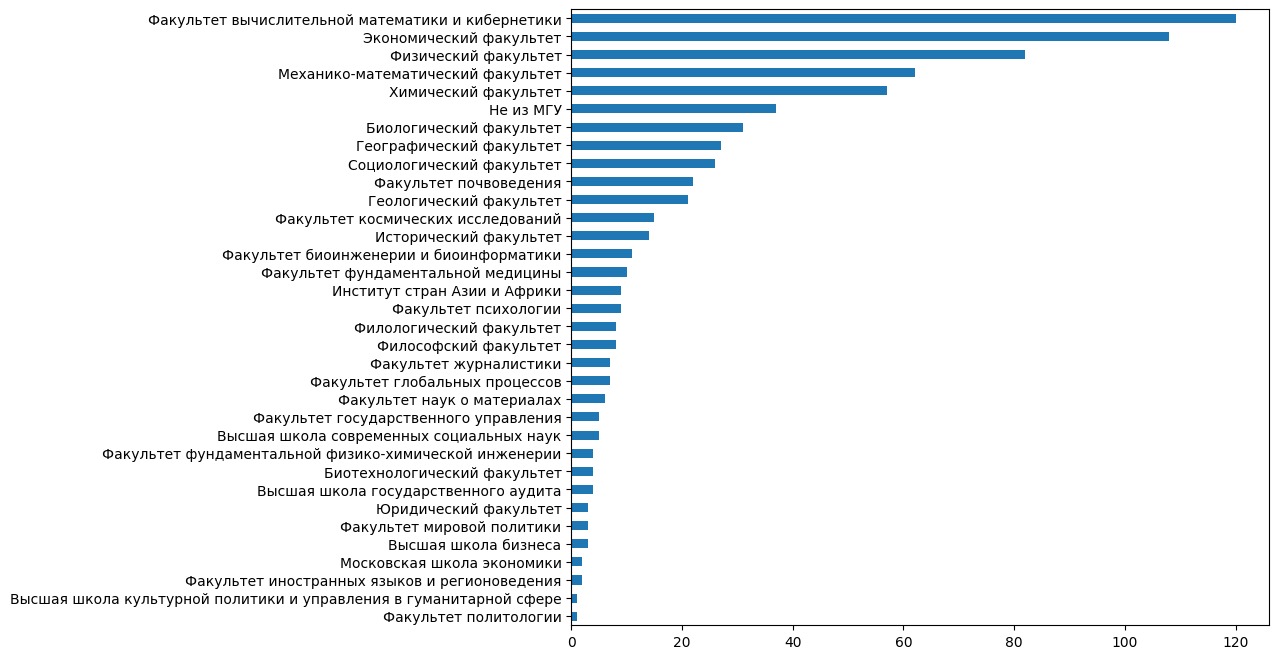

In [ ]:
df_res1['department'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(9, 8))

Теперь нужно сделать удобным анализ информации о задачах. 

In [ ]:
df_res1["1_быстрая_черепашка"].dtypes

dtype('O')

`dtype('O')` означает, что у них "объектный тип", а значит (в нашем случае) — строковый `str` либо `float('NaN')`.

Кроме того, эти ячейки сейчас имеют следующий формат:

- `+n` — задача сдана (число — это количество посылок в систему)
- `-n` — решение задачи неверное (число — это количество посылок в систему)
- `пустое значение` — задача не решалась

Заменим пустые ячейки и значения с минусом на 0, а затем все значения с плюсом на 1.

In [ ]:
df_res1.fillna('-', inplace=True)
df_res1.sample(5)  # случайная выборка 5 строк из таблицы

,1_быстрая_черепашка,2_вопрос_о_фигуре,3_послание_,4_построй_дом!,5_звездочный_квадрат,score,department,hash
181,+1,+,+,+,+,5,Механико-математический факультет,52f8ced0a29282418d67d30f7bf647b99a1280d0
591,+,+,+1,+1,+2,5,Факультет психологии,a17b63f24fb83d16e929c2a28367d99a72b401de
19,+,+1,+1,+3,+,5,Экономический факультет,399fe6be8efaa535678584633762c3d40db104fd
222,+,+,+1,+2,+,5,Экономический факультет,c6c459af12a155af61e7d160b9abbf8cdce3c0fd
34,+1,+,+1,+1,+,5,Факультет журналистики,52a08ec107bea4990709c45bc086665271105879


Дли приведения ячеек о сдачах к числовому формату (1 — сдана, 0 — не сдана) определим следующую преобразующую функцию:

In [ ]:
def task_is_solved(result):
    if result[0] == '+':
        return 1
    else:
        return 0

Применим её ко всем значениям из первых 5 столбцов:

In [ ]:
for column in df_res1.columns[:5]:
    df_res1[column] = df_res1[column].apply(func=task_is_solved)
df_res1.head()

,1_быстрая_черепашка,2_вопрос_о_фигуре,3_послание_,4_построй_дом!,5_звездочный_квадрат,score,department,hash
0,1,1,1,1,1,5,Не из МГУ,b6a720e40da936c330e1f53680b279381d1c5742
1,1,1,1,1,1,5,Физический факультет,57bd006a9261c889d76cba7537a3b61671cbcc6a
2,1,1,1,1,1,5,Механико-математический факультет,0b7a6e627adeb9d50c5ecb7b5a17ea452ec87659
3,1,1,1,1,1,5,Факультет вычислительной математики и кибернетики,c22dc82f7e88a8973a18180d85d5a3b0cf641b75
4,1,1,1,1,1,5,Механико-математический факультет,1ac42c1757e5790d220299fbe51540beda8b1d8a
